Name: **Kshitij Deshpande**<br>
Div: **BE11-P11**<br>
Roll no: **43310**<br>
Title: **Assignment 3: Build the Image classification model**<br>

In [15]:
#importing the libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import datasets, layers, models

In [21]:
#grabbing CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images, test_images = train_images / 255.0, test_images / 255.0

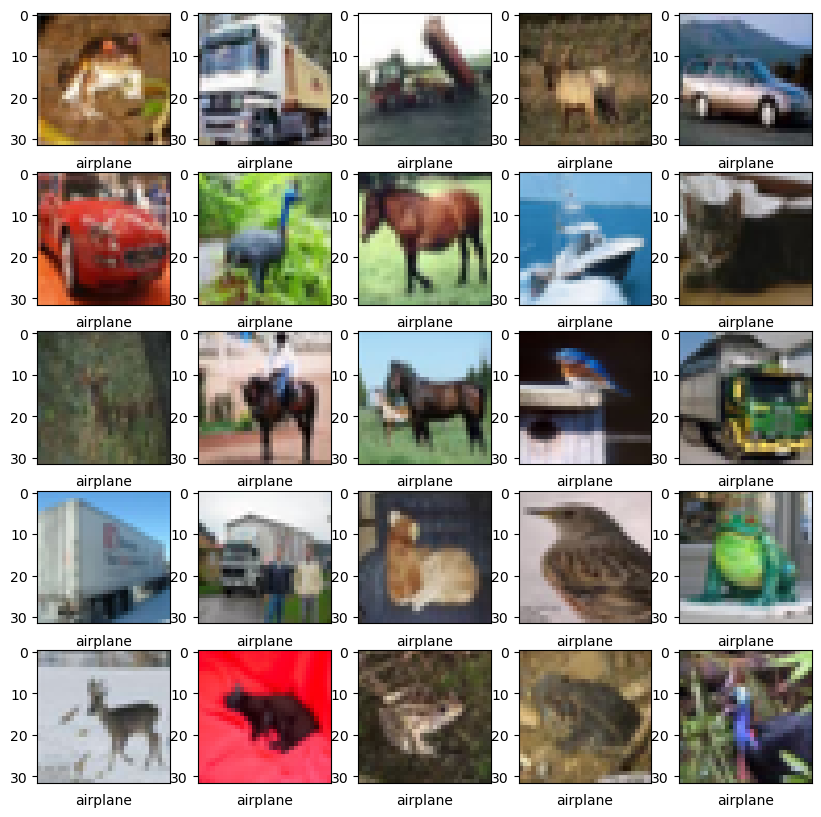

In [33]:
#showing images of mentioned categories
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [22]:
#to convert 10 classes of mnist to one hot encoding(vector consisting of 1 for selected class rest 0)
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)  # fit and then transform y train
test_labels = lb.transform(test_labels)

In [30]:
#building CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [31]:
#model compilation
#adam learning rate adapt karta 
#Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
#A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds.
model.compile(optimizer='adam',loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])#y la one hot encoding nai kela tar sparse
epochs = 5
h = model.fit(train_images, train_labels, epochs=epochs)

Epoch 1/5
1563/1563 [==============================] - 64s 40ms/step - loss: 1.5357 - accuracy: 0.4407
Epoch 2/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1683 - accuracy: 0.5837
Epoch 3/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0065 - accuracy: 0.6450
Epoch 4/5
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9131 - accuracy: 0.6812
Epoch 5/5
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8360 - accuracy: 0.7077


In [32]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 6s 18ms/step - loss: 0.8965 - accuracy: 0.6942


[0.8964651226997375, 0.6941999793052673]